In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import time

In [2]:
def betweenness_clustering(G, K):
    """
    Computes K clusters in G using girvan newman method
    """
    def edges_to_remove(G):
        centralities = nx.edge_betweenness_centrality(G)
        max_centrality = max(centralities.values())
        edges = [edge for edge in centralities if centralities[edge] == max_centrality]
        return edges
    
    def plot_clusters(clusters):
        val_map = {}
        idx = 0
        for cluster in clusters:
            for node in cluster:
                val_map[node] = idx
            idx += 1
        values = [val_map.get(node) for node in G.nodes()]
        nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
        plt.show()
    
    g = G.copy()
    old = time.time()
    connected_components = list(nx.connected_components(g))
    num_connected_components = len(connected_components)
    while (num_connected_components < K):
        edges = edges_to_remove(g)
        for edge in edges:
            g.remove_edge(edge[0], edge[1])
        connected_components = list(nx.connected_components(g))
        num_connected_components = len(connected_components)
    new = time.time()
    print("time taken:", (new - old))
    modularity = nx.algorithms.community.quality.modularity(G, connected_components)
    print("modularity score:", modularity)
    plot_clusters(connected_components)
    return connected_components
        

time taken: 0.14308929443359375
modularity score: 0.45807127882599574


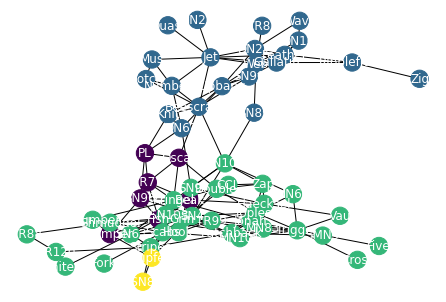

{'Fish', 'TR77', 'Bumper', 'SN96', 'Oscar', 'PL', 'Beak'}
{'Notch', 'MN23', 'Gallatin', 'SN90', 'Zig', 'Quasi', 'Feather', 'Web', 'SN89', 'Jet', 'Ripplefluke', 'Upbang', 'Wave', 'Knit', 'TR82', 'Mus', 'DN16', 'Number1', 'DN63', 'Beescratch', 'DN21'}
{'TSN103', 'TR88', 'Whitetip', 'TR99', 'Zap', 'Vau', 'Hook', 'SMN5', 'Trigger', 'Fork', 'Patchback', 'Five', 'CCL', 'Scabs', 'MN60', 'Haecksel', 'SN100', 'Cross', 'MN83', 'MN105', 'Double', 'Topless', 'SN9', 'Grin', 'SN63', 'SN4', 'Jonah', 'Shmuddel', 'Thumper', 'Stripes', 'Kringel', 'TR120'}
{'TSN83', 'Zipfel'}


In [9]:
dolphins_graph = nx.read_gml("dolphins.gml")
k = 4
clusters = betweenness_clustering(dolphins_graph, k)
for cluster in clusters:
    print(cluster)


time taken: 0.031054258346557617
modularity score: 0.3599605522682445


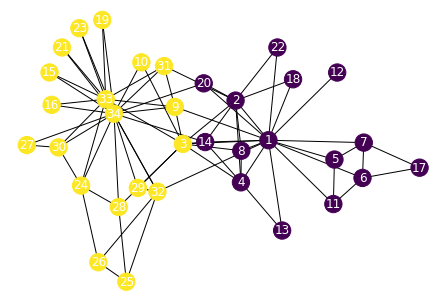

{1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22}
{3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}


In [10]:
karate_graph = nx.read_gml("karate.gml", label="id")
k = 2
clusters = betweenness_clustering(karate_graph, k)
for cluster in clusters:
    print(cluster)

time taken: 2.942744493484497
modularity score: 0.0036236307890708556


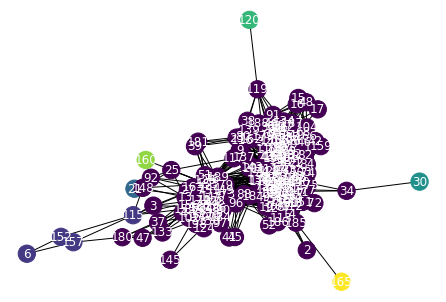

{'198', '82', '70', '174', '159', '113', '99', '87', '63', '66', '88', '133', '48', '20', '118', '166', '15', '96', '5', '176', '116', '188', '95', '112', '72', '23', '39', '185', '61', '179', '182', '62', '193', '31', '168', '105', '8', '77', '106', '78', '164', '128', '1', '46', '32', '38', '85', '134', '189', '148', '59', '130', '33', '98', '178', '13', '75', '51', '184', '111', '55', '25', '161', '93', '181', '79', '162', '187', '136', '170', '155', '43', '145', '56', '102', '172', '74', '143', '197', '91', '9', '104', '84', '24', '156', '45', '139', '131', '149', '76', '171', '125', '97', '89', '26', '154', '140', '2', '137', '17', '127', '146', '57', '126', '65', '53', '14', '19', '36', '163', '71', '117', '42', '109', '135', '34', '29', '47', '83', '175', '60', '67', '138', '69', '4', '195', '186', '121', '150', '180', '107', '141', '58', '169', '173', '18', '101', '94', '147', '123', '73', '191', '190', '114', '86', '80', '110', '196', '144', '153', '50', '41', '52', '28', '194

In [5]:
jazz_graph = nx.read_gml("jazz.gml")
k = 4
clusters = betweenness_clustering(jazz_graph, k)
for cluster in clusters:
    print(cluster)